In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_width, img_height=192,192
input_shape=(img_height,img_width)
train_data_dir='/content/drive/MyDrive/Explicit_Content Dataset/data/'



In [ ]:
batch_size=128;
#Data augmentation
datagen=ImageDataGenerator(
    rescale=1./244,
    validation_split=0.20
 )
train_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="training",
    class_mode='binary'   
)
val_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="validation",
    class_mode='binary',
    shuffle=True

)

Found 12729 images belonging to 2 classes.
Found 3181 images belonging to 2 classes.


In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [2]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(192, 192, 3)) 
x=model_d.output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
preds=Dense(1,activation='softmax')(x) #FC-layer

29097984/29084464 [==============================] - 0s 0us/step


In [3]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 198, 198, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 96, 96, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 96, 96, 64)   256         ['conv1/conv[0][0]']         

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
# opt = Adam(0.01)
opt = Adam(0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import History,ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("/content/drive/MyDrive/Explicit_Content Dataset/", monitor='accuracy', verbose=1, save_best_only=True,
#                              save_weights_only=False)
history=History()
model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,callbacks=[history],
    validation_data=validation_generator
    # validation_steps=2
)

Epoch 1/30
100/100 [==============================] - 2726s 25s/step - loss: 0.8565 - accuracy: 0.6576 - val_loss: 0.3887 - val_accuracy: 0.8692
Epoch 2/30
100/100 [==============================] - 449s 4s/step - loss: 0.5461 - accuracy: 0.7913 - val_loss: 0.2712 - val_accuracy: 0.8994
Epoch 3/30
100/100 [==============================] - 442s 4s/step - loss: 0.4427 - accuracy: 0.8366 - val_loss: 0.2380 - val_accuracy: 0.9104
Epoch 4/30
100/100 [==============================] - 443s 4s/step - loss: 0.3941 - accuracy: 0.8577 - val_loss: 0.2252 - val_accuracy: 0.9161
Epoch 5/30
100/100 [==============================] - 443s 4s/step - loss: 0.3710 - accuracy: 0.8654 - val_loss: 0.2198 - val_accuracy: 0.9180
Epoch 6/30
100/100 [==============================] - 439s 4s/step - loss: 0.3485 - accuracy: 0.8744 - val_loss: 0.2159 - val_accuracy: 0.9205
Epoch 7/30
100/100 [==============================] - 443s 4s/step - loss: 0.3318 - accuracy: 0.8848 - val_loss: 0.2126 - val_accuracy: 0.92

In [ ]:
test_data_dir='/content/drive/MyDrive/test/'
test_generator = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [ ]:
result = model.evaluate(test_generator, batch_size=batch_size)
print("test_loss, test accuracy",result)

32/32 [==============================] - 691s 22s/step - loss: 0.1749 - accuracy: 0.9352
test_loss, test accuracy [0.17486844956874847, 0.9352499842643738]


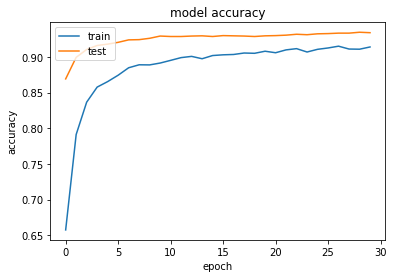

In [ ]:
#summarize History
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Text(0.5, 1.0, 'Loss Curves')

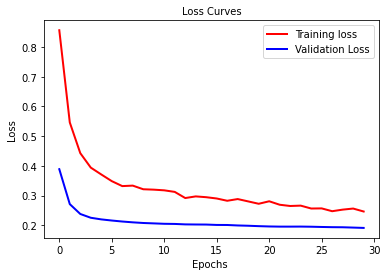

In [ ]:
# Loss Curves
#plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
#plt.grid()
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)